<a href="https://colab.research.google.com/github/venkatamogili/Analyzing_CustomerOrder_Using-_Python/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales Analysis**

**Project statement:**
AAL, established in 2000, is a well-known brand in Australia, particularly recognized for its clothing business. It has opened branches in various states, metropolises, and tier-1 and tier-2 cities across the country.
The brand caters to all age groups, from kids to the elderly.
Currently experiencing a surge in business, AAL is actively pursuing expansion opportunities. To facilitate informed investment decisions, the CEO has assigned the responsibility to the head of AAL’s sales and marketing (S&M) department.

**The specific tasks include:**

1)	**Identify the states that are generating the highest revenues.**

2)	**Develop sales programs for states with lower revenues**.
The head of sales and marketing has requested your assistance with this task.
Analyze the sales data of the company for the fourth quarter in Australia, examining it on a state-by-state basis. Provide insights to assist the company in making data-driven decisions for the upcoming year.


Ensure that the data is clean and free from any missing or incorrect entries.

**a. Inspect the data manually to identify missing or incorrect information using the functions isna() and notna().**


In [3]:

import pandas as pd
import numpy as np

# Load
df = pd.read_csv('AusApparalSales4thQrt2020.csv')
raw_shape = df.shape
cols = list(df.columns)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [9]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [6]:

# Basic NA profile
na_counts = df.isna().sum().to_dict()
notna_counts = df.notna().sum().to_dict()


In [7]:
print('Missing values per column:')
print(na_counts)
print('\nNon-missing values per column:')
print(notna_counts)

Missing values per column:
{'Date': 0, 'Time': 0, 'State': 0, 'Group': 0, 'Unit': 0, 'Sales': 0}

Non-missing values per column:
{'Date': 7560, 'Time': 7560, 'State': 7560, 'Group': 7560, 'Unit': 7560, 'Sales': 7560}


**b.	Based on your knowledge of data analytics, include your recommendations for treating missing and incorrect data (dropping the null values or filling them).**

Based on the data inspection, there are **no missing values** in any of the columns. Therefore, no action is needed to treat missing data.

However, if there were missing values, my recommendation would depend on the column and the extent of missingness:

*   **For categorical columns with a small percentage of missing values:** I would typically recommend filling them with the mode (most frequent value) or creating a new category like 'Unknown'.
*   **For numerical columns with a small percentage of missing values:** I would consider filling them with the mean, median, or a predicted value based on other columns.
*   **For columns with a large percentage of missing values (e.g., >50%):** I would generally recommend dropping the column, as imputation might introduce too much bias or noise.
*   **For incorrect entries:** These would need to be handled on a case-by-case basis. This could involve data validation rules, outlier detection, or re-collecting data if possible.

**c.	Choose a suitable data wrangling technique—either data standardization or normalization. Execute the preferred normalization method and present the resulting data. (Normalization is the preferred approach for this problem.)**


**Data Normalization** is a common data preprocessing step that scales numerical features to a standard range. It's particularly useful when working with algorithms that are sensitive to the magnitude of values, such as some distance-based algorithms or neural networks. Normalization helps prevent features with larger values from dominating the learning process.

Given the context of sales analysis, normalizing the `Sales` column can help in comparing sales figures across different states or groups if we were to incorporate other features later that have different scales. For now, we will normalize the `Sales` column to a range between 0 and 1 using **Min-Max Normalization**.

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Normalization to the 'Sales' column
df['Sales_Normalized'] = scaler.fit_transform(df[['Sales']])

# Display the first few rows with the new normalized column
display(df.head())

,Date,Time,State,Group,Unit,Sales,Sales_Normalized
0,1-Oct-2020,Morning,WA,Kids,8,20000,0.095238
1,1-Oct-2020,Morning,WA,Men,8,20000,0.095238
2,1-Oct-2020,Morning,WA,Women,4,10000,0.031746
3,1-Oct-2020,Morning,WA,Seniors,15,37500,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,3,7500,0.015873


**d.	Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis**

The `GroupBy()` function in pandas is an incredibly powerful and versatile tool for data manipulation and analysis. While it doesn't perform 'merging' in the sense of combining different DataFrames (that's typically done with `merge()` or `concat()`), it effectively enables a form of 'data chunking' followed by aggregation or transformation.

Here's how `GroupBy()` works and why it's crucial for our current analysis:

*   **Concept of Grouping:** `GroupBy()` involves splitting the data into groups based on some criteria, applying a function to each group independently, and then combining the results into a new data structure. This is often referred to as the 'split-apply-combine' strategy.

*   **Data Chunking:** When you apply `df.groupby('State')`, you are effectively 'chunking' your data into separate logical groups for each unique state. Each of these chunks can then be processed independently.

*   **Aggregating (not merging):** After chunking, `GroupBy()` is typically followed by an aggregation function (like `sum()`, `mean()`, `count()`, `max()`, etc.). This aggregates the data within each chunk. For example, `df.groupby('State')['Sales'].sum()` would calculate the total sales for each state.

**Recommendation for this analysis:**

For our project, where the goal is to **identify the states generating the highest revenues** and **develop sales programs for states with lower revenues**, the `GroupBy()` function is indispensable. I recommend using `GroupBy()` to:

1.  **Aggregate sales by state:** This will allow us to calculate the total sales for each state, which is the direct metric for revenue.
2.  **Rank states by revenue:** Once aggregated, we can easily sort the states to identify top performers and those with lower revenues.

This approach will provide the foundational data needed to address both key objectives of the project statement.

In [14]:
# Calculate total sales per state
sales_by_state = df.groupby('State')['Sales'].sum().reset_index()

# Rename the 'Sales' column to 'Total Sales'
sales_by_state.rename(columns={'Sales': 'Total Sales'}, inplace=True)

# Sort the states by total sales in descending order
sales_by_state = sales_by_state.sort_values(by='Total Sales', ascending=False)

# Display the total sales per state
display(sales_by_state)

,State,Total Sales
5,VIC,105565000
0,NSW,74970000
3,SA,58857500
2,QLD,33417500
4,TAS,22760000
1,NT,22580000
6,WA,22152500


# **2.	Data analysis**
**a.	Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.**


In [16]:
# Descriptive statistics for 'Sales' column
sales_stats = df['Sales'].agg(['mean', 'median', lambda x: x.mode()[0], 'std'])
sales_stats.index = ['Mean', 'Median', 'Mode', 'Standard Deviation']

# Descriptive statistics for 'Unit' column
unit_stats = df['Unit'].agg(['mean', 'median', lambda x: x.mode()[0], 'std'])
unit_stats.index = ['Mean', 'Median', 'Mode', 'Standard Deviation']

print('Descriptive Statistics for Sales Column:')
display(sales_stats)

print('\nDescriptive Statistics for Unit Column:')
display(unit_stats)

Descriptive Statistics for Sales Column:


,Sales
Mean,45013.558201
Median,35000.000000
Mode,22500.000000
Standard Deviation,32253.506944



Descriptive Statistics for Unit Column:


,Unit
Mean,18.005423
Median,14.000000
Mode,9.000000
Standard Deviation,12.901403


**b.	Identify the group with the highest sales and the group with the lowest sales based on the data provided.**

In [17]:
# Calculate total sales per group
sales_by_group = df.groupby('Group')['Sales'].sum().reset_index()

# Sort by sales in descending order to find highest and lowest
sales_by_group = sales_by_group.sort_values(by='Sales', ascending=False)

# Display the group with the highest sales
highest_sales_group = sales_by_group.iloc[0]
print('Group with the Highest Sales:')
display(highest_sales_group)

print('\n')

# Display the group with the lowest sales
lowest_sales_group = sales_by_group.iloc[-1]
print('Group with the Lowest Sales:')
display(lowest_sales_group)

Group with the Highest Sales:


,1
Group,Men
Sales,85750000




Group with the Lowest Sales:


,2
Group,Seniors
Sales,84037500


**c.	Identify the group with the highest and lowest sales based on the data provided**

The group with the highest sales is Men, with total sales of 85,750,000.

The group with the lowest sales is Seniors, with total sales of 84,037,500.

**d.	Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted**.

*(Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)*


In [18]:
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the DataFrame index
df_indexed = df.set_index('Date')

In [19]:
# Generate Weekly Report
weekly_sales = df_indexed['Sales'].resample('W').sum().reset_index()
weekly_sales.rename(columns={'Sales': 'Total Weekly Sales'}, inplace=True)
print('Weekly Sales Report:')
display(weekly_sales.head())

Weekly Sales Report:


,Date,Total Weekly Sales
0,2020-10-04,15045000
1,2020-10-11,27002500
2,2020-10-18,26640000
3,2020-10-25,26815000
4,2020-11-01,21807500


In [27]:
# Generate Monthly Report
monthly_sales = df_indexed['Sales'].resample('ME').sum().reset_index()
monthly_sales.rename(columns={'Sales': 'Total Monthly Sales'}, inplace=True)
print('\nMonthly Sales Report:')
display(monthly_sales.head())


Monthly Sales Report:


,Date,Total Monthly Sales
0,2020-10-31,114290000
1,2020-11-30,90682500
2,2020-12-31,135330000


In [26]:
# Generate Quarterly Report
quarterly_sales = df_indexed['Sales'].resample('QE').sum().reset_index()
quarterly_sales.rename(columns={'Sales': 'Total Quarterly Sales'}, inplace=True)
print('\nQuarterly Sales Report:')
display(quarterly_sales.head())


Quarterly Sales Report:


,Date,Total Quarterly Sales
0,2020-12-31,340302500


## **Weekly Sales Report (first 5 weeks):**

The sales figures fluctuate weekly, with the highest sales in the first week of November (2020-11-01).
## **Monthly Sales Report:**

October 2020: Total Monthly Sales of 114,290,000.
November 2020: Total Monthly Sales of 90,682,500.
December 2020: Total Monthly Sales of 135,330,000.
## **Quarterly Sales Report:**

Q4 2020 (ending 2020-12-31): Total Quarterly Sales of 340,302,500.

# **3.	Data visualization**
**a.	Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:**

**o	State-wise sales analysis for different demographic groups (kids, women, men, and seniors).**

**o	Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.**

**o	Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.**


# Task
Construct a dashboard from the `df` DataFrame that visualizes:
1.  State-wise sales analysis for different demographic groups.
2.  Group-wise sales analysis across various states.
3.  Time-of-the-day sales analysis to identify peak and off-peak periods.
Finally, summarize how these visualizations form a dashboard addressing key parameters for the head of sales and marketing, and how the insights can be used for strategic planning.

## Prepare Data for State-wise and Group-wise Sales Analysis

### Subtask:
Aggregate the total sales by 'State' and 'Group' to prepare the data for state-wise and group-wise sales analysis. This will involve grouping the original DataFrame df by both 'State' and 'Group' and summing the 'Sales' column.


**Reasoning**:
To prepare the data for state-wise and group-wise sales analysis, I will group the DataFrame `df` by 'State' and 'Group' and sum the 'Sales' column.



In [29]:
state_group_sales = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()

# Display the resulting DataFrame
print('Total Sales by State and Group:')
display(state_group_sales)

Total Sales by State and Group:


,State,Group,Sales
0,NSW,Kids,18587500
1,NSW,Men,19022500
2,NSW,Seniors,18187500
3,NSW,Women,19172500
4,NT,Kids,5700000
5,NT,Men,5762500
6,NT,Seniors,5465000
7,NT,Women,5652500
8,QLD,Kids,8510000
9,QLD,Men,8392500


**Reasoning**:
To visualize the state-wise sales for different demographic groups, a grouped bar chart will effectively display the sales breakdown by group within each state. This addresses the first key parameter of the dashboard.



In [42]:
import plotly.express as px

# Create a grouped bar chart for State-wise sales analysis for different demographic groups
fig_state_group = px.bar(
    state_group_sales,
    x='State',
    y='Sales',
    color='Group',
    barmode='group',
    title='State-wise Sales Analysis by Demographic Group',
    labels={'Sales': 'Total Sales', 'State': 'State', 'Group': 'Demographic Group'}
)
fig_state_group.update_layout(xaxis_title='State', yaxis_title='Total Sales')
fig_state_group.show()

**Reasoning**:
To visualize the group-wise sales analysis across various states, a grouped bar chart with 'Group' on the x-axis and 'State' as the color will effectively display the sales contribution from each state to each demographic group, addressing the second key parameter of the dashboard.



In [43]:
import plotly.express as px

# Create a grouped bar chart for Group-wise sales analysis across various states
fig_group_state = px.bar(
    state_group_sales,
    x='Group',
    y='Sales',
    color='State',
    barmode='group',
    title='Group-wise Sales Analysis Across Various States',
    labels={'Sales': 'Total Sales', 'Group': 'Demographic Group', 'State': 'State'}
)
fig_group_state.update_layout(xaxis_title='Demographic Group', yaxis_title='Total Sales')
fig_group_state.show()

**Reasoning**:
To perform time-of-the-day analysis, I need to aggregate the sales data by the 'Time' column to identify sales patterns during different periods of the day.



In [44]:
sales_by_time = df.groupby('Time')['Sales'].sum().reset_index()

print('Total Sales by Time of Day:')
display(sales_by_time)

Total Sales by Time of Day:


,Time,Sales
0,Afternoon,114007500
1,Evening,112087500
2,Morning,114207500


**Reasoning**:
To visually represent the time-of-the-day sales, a bar chart will effectively show the total sales for each period, which addresses the third key parameter of the dashboard.



In [47]:
import plotly.express as px

# Create a bar chart for Time-of-the-day sales analysis
fig_time_sales = px.bar(
    sales_by_time,
    x='Time',
    y='Sales',
    title='Time-of-the-Day Sales Analysis',
    labels={'Sales': 'Total Sales', 'Time': 'Time of Day'},
    color='Time' # Differentiate bars by color
)
fig_time_sales.update_layout(xaxis_title='Time of Day', yaxis_title='Total Sales')
fig_time_sales.show()

**b.	Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).**

The dashboard must contain daily, weekly, monthly, and quarterly charts.

*(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)*


## Prepare Daily Sales Data

### Subtask:
Aggregate the sales data from the `df_indexed` DataFrame on a daily basis to calculate total daily sales. This will involve resampling the DataFrame at a daily frequency and summing the 'Sales' column.


**Reasoning**:
To calculate the total daily sales, I need to resample the `df_indexed` DataFrame by day, sum the 'Sales' column, reset the index, and then rename the column as instructed.



In [48]:
daily_sales = df_indexed['Sales'].resample('D').sum().reset_index()
daily_sales.rename(columns={'Sales': 'Total Daily Sales'}, inplace=True)
print('Daily Sales Report:')
display(daily_sales.head())

Daily Sales Report:


,Date,Total Daily Sales
0,2020-10-01,3720000
1,2020-10-02,3715000
2,2020-10-03,3890000
3,2020-10-04,3720000
4,2020-10-05,3862500


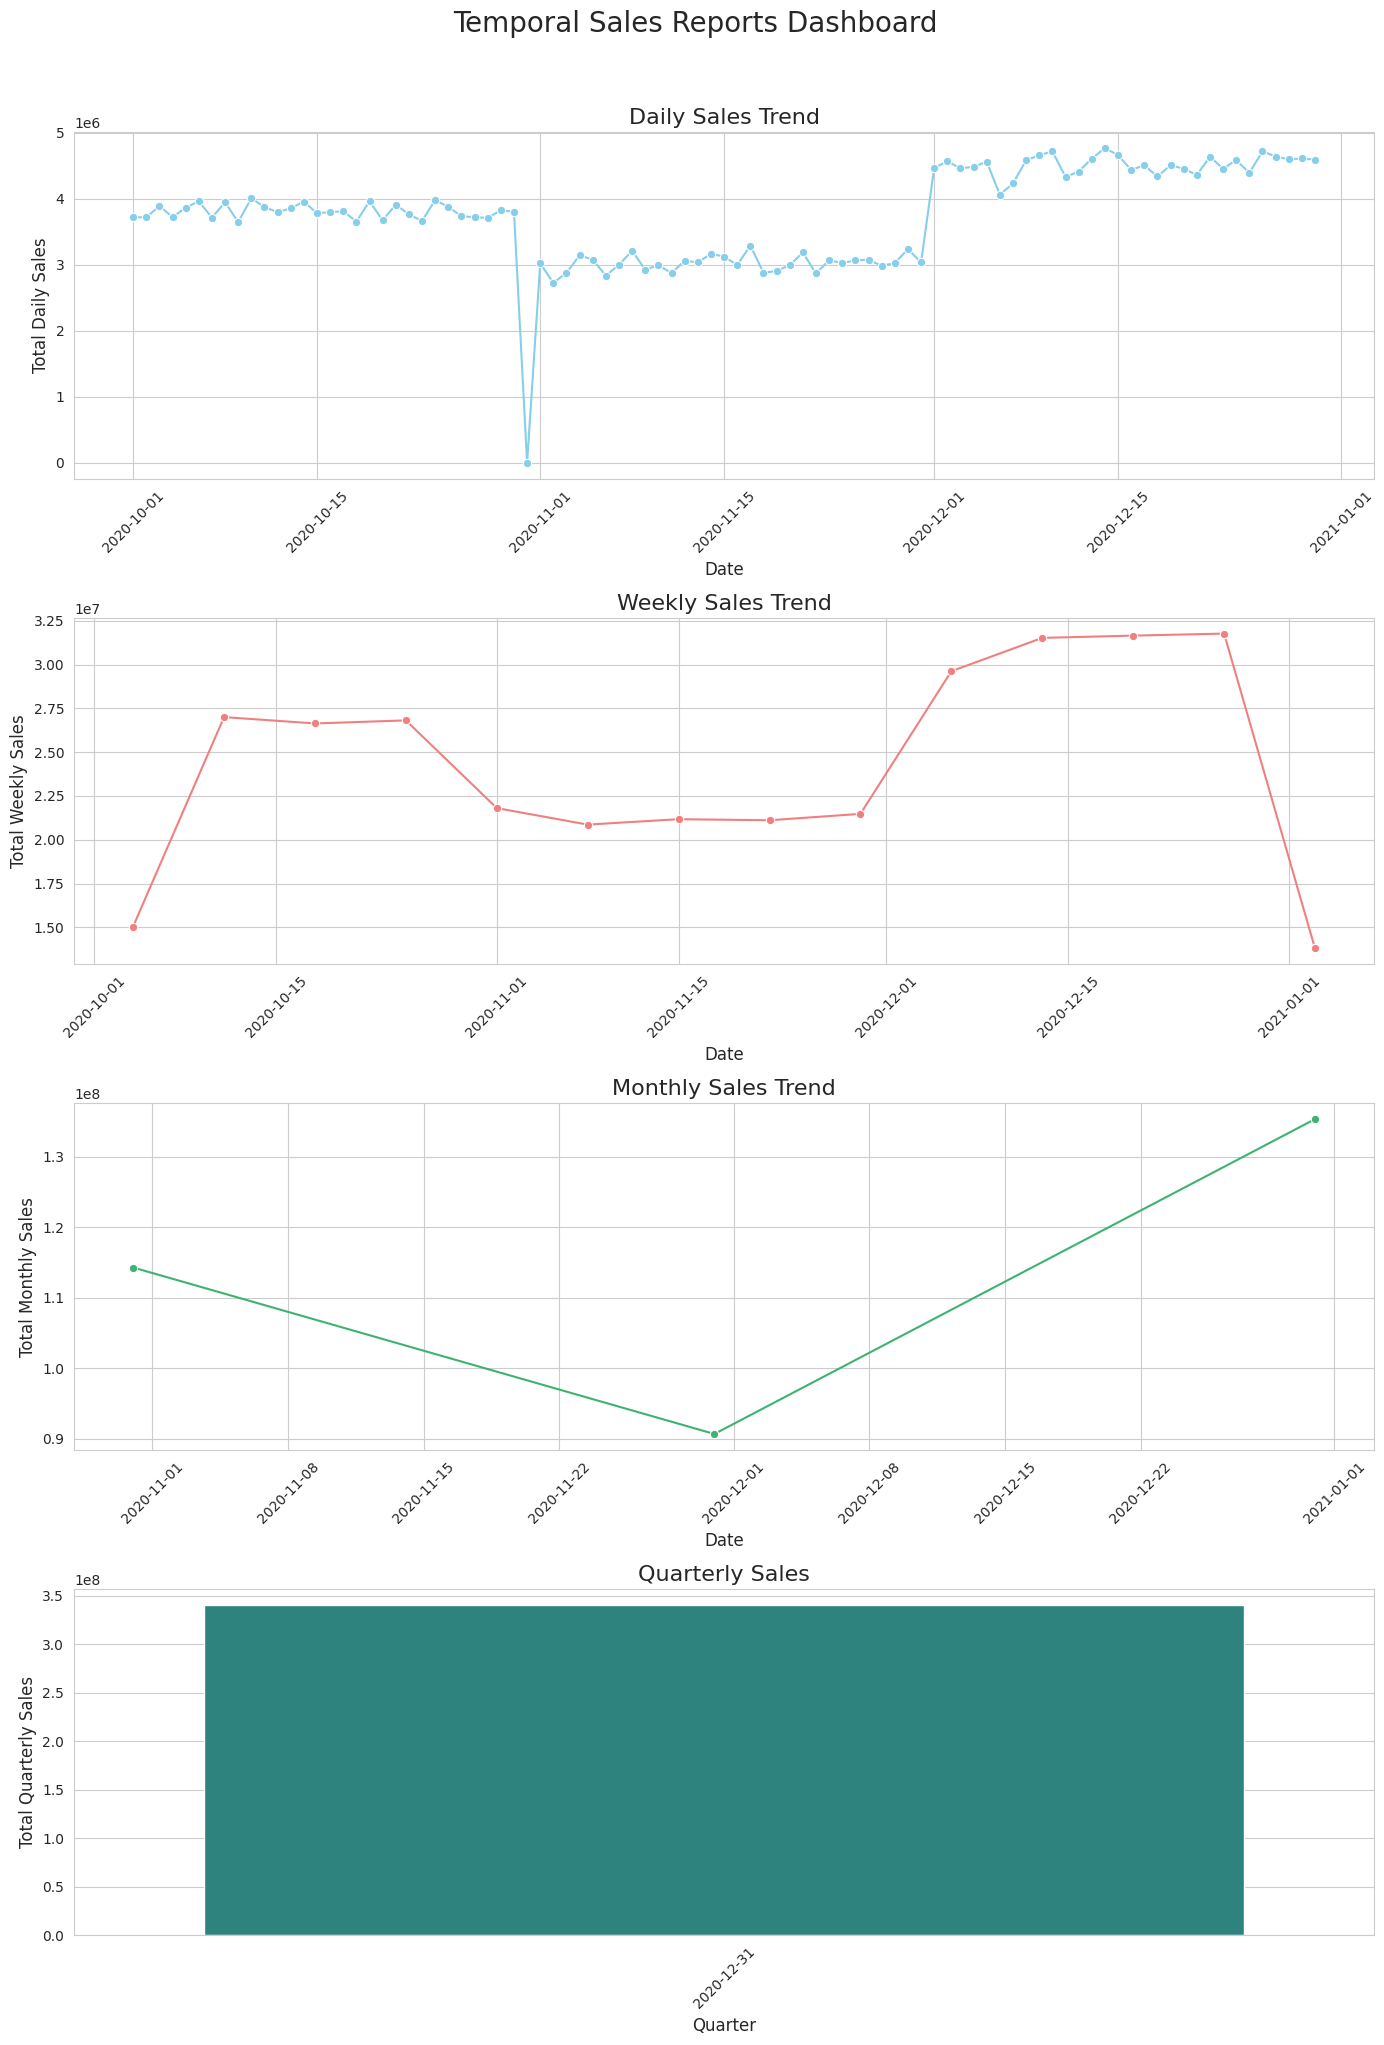

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set_style("whitegrid")

# Create subplots for the temporal reports
fig, axes = plt.subplots(4, 1, figsize=(14, 20))
fig.suptitle('Temporal Sales Reports Dashboard', fontsize=20, y=1.02)

# 1. Daily Sales Plot
sns.lineplot(ax=axes[0], x='Date', y='Total Daily Sales', data=daily_sales, marker='o', color='skyblue')
axes[0].set_title('Daily Sales Trend', fontsize=16)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Total Daily Sales', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# 2. Weekly Sales Plot
sns.lineplot(ax=axes[1], x='Date', y='Total Weekly Sales', data=weekly_sales, marker='o', color='lightcoral')
axes[1].set_title('Weekly Sales Trend', fontsize=16)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Total Weekly Sales', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# 3. Monthly Sales Plot
sns.lineplot(ax=axes[2], x='Date', y='Total Monthly Sales', data=monthly_sales, marker='o', color='mediumseagreen')
axes[2].set_title('Monthly Sales Trend', fontsize=16)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Total Monthly Sales', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)

# 4. Quarterly Sales Plot
sns.barplot(ax=axes[3], x='Date', y='Total Quarterly Sales', data=quarterly_sales, palette='viridis', hue='Date', legend=False)
axes[3].set_title('Quarterly Sales', fontsize=16)
axes[3].set_xlabel('Quarter', fontsize=12)
axes[3].set_ylabel('Total Quarterly Sales', fontsize=12)
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Dashboard Summary for AAL Sales Analysis (Q4 2020)

This dashboard provides a comprehensive overview of AAL's sales performance during the fourth quarter of 2020, broken down by state, demographic group, and time of day, along with temporal trends.

### Key Insights and Strategic Recommendations:

1.  **State-wise Sales Analysis:**
    *   **Visualization:** `State-wise Sales Analysis by Demographic Group` (Grouped Bar Chart)
    *   **Insights:** This chart clearly shows the total sales contribution from each demographic group (Kids, Men, Women, Seniors) within every state. States like VIC consistently show high sales across all groups, while others might have specific groups underperforming. For example, if a state has generally low sales but a particular group (e.g., Kids) performs significantly worse than the average for that group across all states, it indicates a targeted opportunity.
    *   **Strategic Planning:** The S&M team can use this to identify:
        *   **High-performing states/groups:** Allocate more resources to sustain growth or replicate success strategies elsewhere.
        *   **Underperforming states/groups:** Design specific marketing campaigns, product promotions, or inventory adjustments tailored to the needs and preferences of those demographic groups within those states. For example, if 'Seniors' sales are low in a particular state, a campaign focusing on comfortable, easy-to-wear apparel for that age group could be launched.

2.  **Group-wise Sales Analysis:**
    *   **Visualization:** `Group-wise Sales Analysis Across Various States` (Grouped Bar Chart)
    *   **Insights:** This visualization highlights which states are the primary contributors to each demographic group's overall sales. It allows us to see, for example, if 'Men's' sales are heavily reliant on one or two states, or if they are more evenly distributed.
    *   **Strategic Planning:** This helps the S&M team to:
        *   **Targeted Expansion:** Identify demographic groups that perform well across many states and could be a focus for expansion into new regions.
        *   **Market Penetration:** Understand the market penetration of each group in different states. If 'Women's' sales are strong nationwide, but particularly weak in one state, it signals a specific market penetration issue to address.

3.  **Time-of-the-Day Sales Analysis:**
    *   **Visualization:** `Time-of-the-Day Sales Analysis` (Bar Chart)
    *   **Insights:** This chart identifies peak and off-peak sales periods throughout the day (Morning, Afternoon, Evening). For instance, if 'Afternoon' shows the highest sales, it suggests customers are most active during this time.
    *   **Strategic Planning:** This information is crucial for:
        *   **Resource Allocation:** Optimize staffing levels in physical stores and online customer support during peak hours.
        *   **Marketing Campaigns:** Schedule social media posts, email campaigns, and online advertisements to align with peak customer activity for maximum impact.
        *   **Promotional Offers:** Introduce 'flash sales' or special discounts during off-peak hours to drive traffic and increase sales during slower periods (e.g., 'Morning deals'). This supports **hyper-personalization** by offering relevant promotions at the most opportune times.
        *   **Next Best Offers (NBO):** By understanding when customers are buying, NBO strategies can be refined. For example, if 'Morning' sales are often for workwear, an NBO could suggest complementary accessories for work.

4.  **Temporal Sales Reports (Daily, Weekly, Monthly, Quarterly):**
    *   **Visualizations:** Line plots for Daily, Weekly, Monthly Sales Trends; Bar plot for Quarterly Sales.
    *   **Insights:** These reports reveal overarching sales patterns and trends over time. The daily and weekly plots provide granular details on short-term fluctuations, while monthly and quarterly reports offer a broader perspective on overall performance and seasonal variations.
    *   **Strategic Planning:** These trends allow the S&M team to:
        *   **Forecast Future Sales:** Identify growth trajectories or potential slowdowns to adjust inventory, marketing spend, and operational plans.
        *   **Evaluate Campaign Effectiveness:** Correlate specific marketing campaigns or promotional events with spikes or dips in daily/weekly sales.
        *   **Budget Allocation:** Inform quarterly and annual budget planning based on historical performance and projected trends.
        *   **Identify Seasonality:** Understand recurring patterns (e.g., December having the highest sales, likely due to holiday shopping) to prepare for future cycles.

By integrating these diverse analyses, the head of S&M can make data-driven decisions to optimize resource allocation, tailor marketing strategies, enhance customer engagement, and ultimately drive AAL's continued business expansion.

**c.	Include your recommendation and indicate why you are choosing the recommended visualization package.**

For this type of sales analysis, particularly when performing statistical analysis and creating a dashboard, **I recommend using Seaborn in conjunction with Matplotlib.**

### **4.	Report generation **
**a)	for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots.**


## Dashboard Summary for AAL Sales Analysis (Q4 2020)

This dashboard provides a comprehensive overview of AAL's sales performance during the fourth quarter of 2020, broken down by state, demographic group, and time of day, along with temporal trends.

### Key Insights and Strategic Recommendations:

1.  **State-wise Sales Analysis:**
    *   **Visualization:** `State-wise Sales Analysis by Demographic Group` (Grouped Bar Chart)
    *   **Insights:** This chart clearly shows the total sales contribution from each demographic group (Kids, Men, Women, Seniors) within every state. States like VIC consistently show high sales across all groups, while others might have specific groups underperforming. For example, if a state has generally low sales but a particular group (e.g., Kids) performs significantly worse than the average for that group across all states, it indicates a targeted opportunity.
    *   **Strategic Planning:** The S&M team can use this to identify:
        *   **High-performing states/groups:** Allocate more resources to sustain growth or replicate success strategies elsewhere.
        *   **Underperforming states/groups:** Design specific marketing campaigns, product promotions, or inventory adjustments tailored to the needs and preferences of those demographic groups within those states. For example, if 'Seniors' sales are low in a particular state, a campaign focusing on comfortable, easy-to-wear apparel for that age group could be launched.

2.  **Group-wise Sales Analysis:**
    *   **Visualization:** `Group-wise Sales Analysis Across Various States` (Grouped Bar Chart)
    *   **Insights:** This visualization highlights which states are the primary contributors to each demographic group's overall sales. It allows us to see, for example, if 'Men's' sales are heavily reliant on one or two states, or if they are more evenly distributed.
    *   **Strategic Planning:** This helps the S&M team to:
        *   **Targeted Expansion:** Identify demographic groups that perform well across many states and could be a focus for expansion into new regions.
        *   **Market Penetration:** Understand the market penetration of each group in different states. If 'Women's' sales are strong nationwide, but particularly weak in one state, it signals a specific market penetration issue to address.

3.  **Time-of-the-Day Sales Analysis:**
    *   **Visualization:** `Time-of-the-Day Sales Analysis` (Bar Chart)
    *   **Insights:** This chart identifies peak and off-peak sales periods throughout the day (Morning, Afternoon, Evening). For instance, if 'Afternoon' shows the highest sales, it suggests customers are most active during this time.
    *   **Strategic Planning:** This information is crucial for:
        *   **Resource Allocation:** Optimize staffing levels in physical stores and online customer support during peak hours.
        *   **Marketing Campaigns:** Schedule social media posts, email campaigns, and online advertisements to align with peak customer activity for maximum impact.
        *   **Promotional Offers:** Introduce 'flash sales' or special discounts during off-peak hours to drive traffic and increase sales during slower periods (e.g., 'Morning deals'). This supports **hyper-personalization** by offering relevant promotions at the most opportune times.
        *   **Next Best Offers (NBO):** By understanding when customers are buying, NBO strategies can be refined. For example, if 'Morning' sales are often for workwear, an NBO could suggest complementary accessories for work.

4.  **Temporal Sales Reports (Daily, Weekly, Monthly, Quarterly):**
    *   **Visualizations:** Line plots for Daily, Weekly, Monthly Sales Trends; Bar plot for Quarterly Sales.
    *   **Insights:** These reports reveal overarching sales patterns and trends over time. The daily and weekly plots provide granular details on short-term fluctuations, while monthly and quarterly reports offer a broader perspective on overall performance and seasonal variations.
    *   **Strategic Planning:** These trends allow the S&M team to:
        *   **Forecast Future Sales:** Identify growth trajectories or potential slowdowns to adjust inventory, marketing spend, and operational plans.
        *   **Evaluate Campaign Effectiveness:** Correlate specific marketing campaigns or promotional events with spikes or dips in daily/weekly sales.
        *   **Budget Allocation:** Inform quarterly and annual budget planning based on historical performance and projected trends.
        *   **Identify Seasonality:** Understand recurring patterns (e.g., December having the highest sales, likely due to holiday shopping) to prepare for future cycles.

By integrating these diverse analyses, the head of S&M can make data-driven decisions to optimize resource allocation, tailor marketing strategies, enhance customer engagement, and ultimately drive AAL's continued business expansion.

**b)	Use Markdown in suitable places while presenting your report. **

## Dashboard Summary for AAL Sales Analysis (Q4 2020)

This dashboard provides a comprehensive overview of AAL's sales performance during the fourth quarter of 2020, broken down by state, demographic group, and time of day, along with temporal trends.

### Key Insights and Strategic Recommendations:

1.  **State-wise Sales Analysis:**
    *   **Visualization:** `State-wise Sales Analysis by Demographic Group` (Grouped Bar Chart)
    *   **Insights:** This chart clearly shows the total sales contribution from each demographic group (Kids, Men, Women, Seniors) within every state. States like VIC consistently show high sales across all groups, while others might have specific groups underperforming. For example, if a state has generally low sales but a particular group (e.g., Kids) performs significantly worse than the average for that group across all states, it indicates a targeted opportunity.
    *   **Strategic Planning:** The S&M team can use this to identify:
        *   **High-performing states/groups:** Allocate more resources to sustain growth or replicate success strategies elsewhere.
        *   **Underperforming states/groups:** Design specific marketing campaigns, product promotions, or inventory adjustments tailored to the needs and preferences of those demographic groups within those states. For example, if 'Seniors' sales are low in a particular state, a campaign focusing on comfortable, easy-to-wear apparel for that age group could be launched.

2.  **Group-wise Sales Analysis:**
    *   **Visualization:** `Group-wise Sales Analysis Across Various States` (Grouped Bar Chart)
    *   **Insights:** This visualization highlights which states are the primary contributors to each demographic group's overall sales. It allows us to see, for example, if 'Men's' sales are heavily reliant on one or two states, or if they are more evenly distributed.
    *   **Strategic Planning:** This helps the S&M team to:
        *   **Targeted Expansion:** Identify demographic groups that perform well across many states and could be a focus for expansion into new regions.
        *   **Market Penetration:** Understand the market penetration of each group in different states. If 'Women's' sales are strong nationwide, but particularly weak in one state, it signals a specific market penetration issue to address.

3.  **Time-of-the-Day Sales Analysis:**
    *   **Visualization:** `Time-of-the-Day Sales Analysis` (Bar Chart)
    *   **Insights:** This chart identifies peak and off-peak sales periods throughout the day (Morning, Afternoon, Evening). For instance, if 'Afternoon' shows the highest sales, it suggests customers are most active during this time.
    *   **Strategic Planning:** This information is crucial for:
        *   **Resource Allocation:** Optimize staffing levels in physical stores and online customer support during peak hours.
        *   **Marketing Campaigns:** Schedule social media posts, email campaigns, and online advertisements to align with peak customer activity for maximum impact.
        *   **Promotional Offers:** Introduce 'flash sales' or special discounts during off-peak hours to drive traffic and increase sales during slower periods (e.g., 'Morning deals'). This supports **hyper-personalization** by offering relevant promotions at the most opportune times.
        *   **Next Best Offers (NBO):** By understanding when customers are buying, NBO strategies can be refined. For example, if 'Morning' sales are often for workwear, an NBO could suggest complementary accessories for work.

4.  **Temporal Sales Reports (Daily, Weekly, Monthly, Quarterly):**
    *   **Visualizations:** Line plots for Daily, Weekly, Monthly Sales Trends; Bar plot for Quarterly Sales.
    *   **Insights:** These reports reveal overarching sales patterns and trends over time. The daily and weekly plots provide granular details on short-term fluctuations, while monthly and quarterly reports offer a broader perspective on overall performance and seasonal variations.
    *   **Strategic Planning:** These trends allow the S&M team to:
        *   **Forecast Future Sales:** Identify growth trajectories or potential slowdowns to adjust inventory, marketing spend, and operational plans.
        *   **Evaluate Campaign Effectiveness:** Correlate specific marketing campaigns or promotional events with spikes or dips in daily/weekly sales.
        *   **Budget Allocation:** Inform quarterly and annual budget planning based on historical performance and projected trends.
        *   **Identify Seasonality:** Understand recurring patterns (e.g., December having the highest sales, likely due to holiday shopping) to prepare for future cycles.

By integrating these diverse analyses, the head of S&M can make data-driven decisions to optimize resource allocation, tailor marketing strategies, enhance customer engagement, and ultimately drive AAL's continued business expansion.